In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/cvd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/cvd


In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss

encoder = preprocessing.LabelEncoder()

###Data Preprocessing

In [2]:
data = pd.read_csv('cvd/data.csv')
data = data.drop('id',axis=1)
data = data.fillna(np.nan,axis=0)
data['location'] = encoder.fit_transform(data['location'].astype(str))
data['country'] = encoder.fit_transform(data['country'].astype(str))
data['gender'] = encoder.fit_transform(data['gender'].astype(str))
data[['symptom1']] = encoder.fit_transform(data['symptom1'].astype(str))
data[['symptom2']] = encoder.fit_transform(data['symptom2'].astype(str))
data[['symptom3']] = encoder.fit_transform(data['symptom3'].astype(str))
data[['symptom4']] = encoder.fit_transform(data['symptom4'].astype(str))
data[['symptom5']] = encoder.fit_transform(data['symptom5'].astype(str))
data[['symptom6']] = encoder.fit_transform(data['symptom6'].astype(str))

In [3]:
data['sym_on'] = pd.to_datetime(data['sym_on'])
data['hosp_vis'] = pd.to_datetime(data['hosp_vis'])
data['sym_on']= data['sym_on'].map(dt.datetime.toordinal)
data['hosp_vis']= data['hosp_vis'].map(dt.datetime.toordinal)
data['diff_sym_hos']= data['hosp_vis'] - data['sym_on']

In [4]:
data['diff_symp_hos'] = data['hosp_vis']-data['sym_on']

In [5]:
data = data.drop(['sym_on','hosp_vis'],axis=1)

In [6]:
print(data.dtypes)

location           int64
country            int64
gender             int64
age              float64
vis_wuhan          int64
from_wuhan       float64
death              int64
recov              int64
symptom1           int64
symptom2           int64
symptom3           int64
symptom4           int64
symptom5           int64
symptom6           int64
diff_sym_hos       int64
diff_symp_hos      int64
dtype: object


###Training

In [7]:
tdata = pd.read_csv('cvd/train.csv')
print(tdata.head())

   id      location country gender   age      sym_on    hosp_vis  vis_wuhan  \
0  49  Wuhan, Hubei   China   male  61.0  12/20/2019  12/27/2019          0   
1  50  Wuhan, Hubei   China   male  69.0  12/30/2019    1/3/2020          0   
2  51  Wuhan, Hubei   China   male  89.0         NaN         NaN          0   
3  52  Wuhan, Hubei   China   male  89.0   1/13/2020   1/13/2020          0   
4  53  Wuhan, Hubei   China   male  66.0   1/10/2020   1/16/2020          0   

   from_wuhan  death symptom1 symptom2 symptom3  symptom4  symptom5  symptom6  
0           1      1      NaN      NaN      NaN       NaN       NaN       NaN  
1           1      1      NaN      NaN      NaN       NaN       NaN       NaN  
2           1      1      NaN      NaN      NaN       NaN       NaN       NaN  
3           1      1      NaN      NaN      NaN       NaN       NaN       NaN  
4           1      1      NaN      NaN      NaN       NaN       NaN       NaN  


In [8]:
tdata = pd.read_csv('cvd/train.csv')
tdata = tdata.drop('id',axis=1)
tdata = tdata.fillna(np.nan,axis=0)
tdata['age'] = tdata['age'].fillna(value=tdata['age'].mean())
tdata['location'] = encoder.fit_transform(tdata['location'].astype(str))
tdata['country'] = encoder.fit_transform(tdata['country'].astype(str))
tdata['gender'] = encoder.fit_transform(tdata['gender'].astype(str))
tdata[['symptom1']] = encoder.fit_transform(tdata['symptom1'].astype(str))
tdata[['symptom2']] = encoder.fit_transform(tdata['symptom2'].astype(str))
tdata[['symptom3']] = encoder.fit_transform(tdata['symptom3'].astype(str))
tdata[['symptom4']] = encoder.fit_transform(tdata['symptom4'].astype(str))
tdata[['symptom5']] = encoder.fit_transform(tdata['symptom5'].astype(str))
tdata[['symptom6']] = encoder.fit_transform(tdata['symptom6'].astype(str))

In [9]:
tdata['sym_on'] = pd.to_datetime(tdata['sym_on'])
tdata['hosp_vis'] = pd.to_datetime(tdata['hosp_vis'])
tdata['sym_on']= tdata['sym_on'].map(dt.datetime.toordinal)
tdata['hosp_vis']= tdata['hosp_vis'].map(dt.datetime.toordinal)
tdata['diff_sym_hos']= tdata['hosp_vis'] - tdata['sym_on']

In [17]:
tdata['diff_sym_hos']

0      7
1      4
2      0
3      0
4      6
      ..
217    0
218    0
219    0
220    0
221    0
Name: diff_sym_hos, Length: 222, dtype: int64

In [10]:
tdata = tdata.drop(['sym_on','hosp_vis'],axis=1)
print(tdata)

     location  country  gender        age  vis_wuhan  from_wuhan  death  \
0          38        2       1  61.000000          0           1      1   
1          38        2       1  69.000000          0           1      1   
2          38        2       1  89.000000          0           1      1   
3          38        2       1  89.000000          0           1      1   
4          38        2       1  66.000000          0           1      1   
..        ...      ...     ...        ...        ...         ...    ...   
217         2        3       2  49.747537          0           0      0   
218        22        6       2  49.747537          0           0      1   
219        22        6       2  49.747537          0           0      1   
220        22        6       2  49.747537          0           0      1   
221        22        6       2  49.747537          0           0      1   

     symptom1  symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  
0           9      

In [11]:
print(tdata.isna().sum())

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
death           0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
dtype: int64


In [12]:
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm

###Logisitic Regression

In [13]:
from sklearn.linear_model import LogisticRegression as lr

classifier = lr()

In [18]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [15]:
#X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan','diff_sym_hos']]
#Y = tdata['death']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))


/opt/conda/shared/envs/ds38/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/shared/envs/ds38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#####Evaluation of model

In [20]:
pred = np.array(classifier.predict(X_test))

recall_lr = rs(Y_test,pred)
precision_lr = ps(Y_test,pred)
f1_lr = fs(Y_test,pred)
ma_lr = classifier.score(X_test,Y_test)

In [21]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_lr)
print('Precision Score: ',precision_lr)
print('F1 Score: ',f1_lr)
print('Accuracy: ',ma_lr)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.7272727272727273
Precision Score:  0.6666666666666666
F1 Score:  0.6956521739130435
Accuracy:  0.8444444444444444

	Table 3

     death  pred
184      0     0
170      1     0
142      0     0
182      0     0
49       1     1


In [76]:
classifier.coef_

array([[ 0.0764639 , -0.27454325,  1.12256303,  0.09910521, -1.68402918,
        -0.17145781,  0.01534966, -0.15687458,  0.37534682,  0.        ,
         0.        ,  0.        ,  0.06241891]])

In [77]:
X_train

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
1,38,2,1,69.0,0,1,9,9,11,0,0,0,4
2,38,2,1,89.0,0,1,9,9,11,0,0,0,0
56,32,7,0,75.0,0,0,5,1,5,0,0,0,0
55,32,7,0,55.0,0,0,5,1,10,0,0,0,0
10,38,2,0,82.0,0,1,9,9,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,27,12,0,42.0,0,0,9,9,11,0,0,0,3
64,10,8,1,40.0,0,1,9,9,11,0,0,0,0
15,38,2,0,70.0,0,1,9,9,11,0,0,0,0
125,27,12,1,62.0,0,0,9,9,11,0,0,0,0


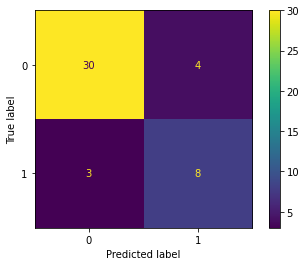

In [74]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, Y_test);

Text(0.5, 1.0, 'Evaluation Metrics for Logistic Regression')

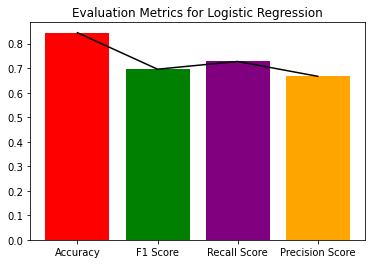

In [75]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_lr,f1_lr,recall_lr,precision_lr],color=['red','green','purple','orange'])
plt.plot([ma_lr,f1_lr,recall_lr,precision_lr],color='black')
plt.title('Evaluation Metrics for Logistic Regression')

In [0]:
#print(pd.DataFrame({'Val':Y_test,'Pred':classifier.predict(X_test)}))

###Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc(max_depth=2)

In [33]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))


DecisionTreeClassifier(max_depth=2)

######Evaluation of the model

In [35]:
pred = np.array(classifier.predict(X_test))

recall_dtc = rs(Y_test,pred)
precision_dtc = ps(Y_test,pred)
f1_dtc = fs(Y_test,pred)
ma_dtc = classifier.score(X_test,Y_test)

In [36]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_dtc)
print('Precision Score: ',precision_dtc)
print('F1 Score: ',f1_dtc)
print('Accuracy: ',ma_dtc)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.5454545454545454
Precision Score:  0.8571428571428571
F1 Score:  0.6666666666666665
Accuracy:  0.8666666666666667

	Table 3

     death  pred
184      0     0
170      1     0
142      0     0
182      0     0
49       1     0


Text(0.5, 1.0, 'Evaluation Metrics for Decision Tree')

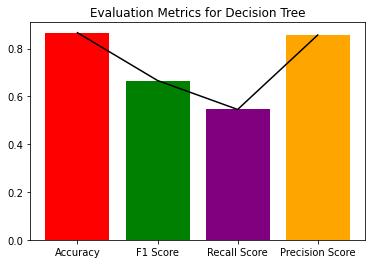

In [37]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_dtc,f1_dtc,recall_dtc,precision_dtc],color=['red','green','purple','orange'])
plt.plot([ma_dtc,f1_dtc,recall_dtc,precision_dtc],color='black')
plt.title('Evaluation Metrics for Decision Tree')

######Visualizing the decision trees from random forest

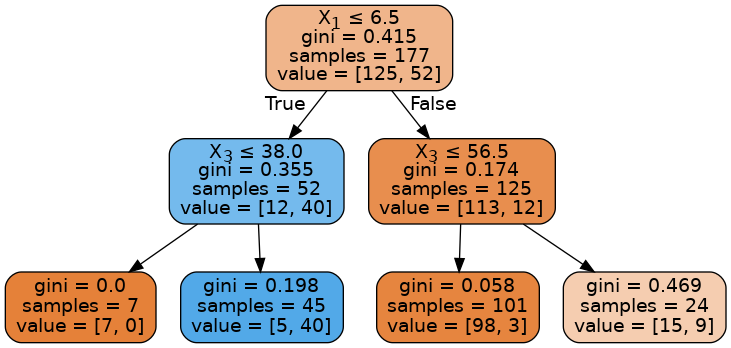

In [42]:
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

estimator = classifier
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(),width=250,height=200)

###SVM

In [62]:
from sklearn import svm
classifier = svm.SVC()

In [63]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))


/opt/conda/shared/envs/ds38/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

######Evaluation of the model

In [65]:
pred = np.array(classifier.predict(X_test))

recall_svm = rs(Y_test,pred)
precision_svm = ps(Y_test,pred)
f1_svm = fs(Y_test,pred)
ma_svm = classifier.score(X_test,Y_test)

In [66]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_svm)
print('Precision Score: ',precision_svm)
print('F1 Score: ',f1_svm)
print('Accuracy: ',ma_svm)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.6363636363636364
Precision Score:  0.7
F1 Score:  0.6666666666666666
Accuracy:  0.8444444444444444

	Table 3

     death  pred
184      0     0
170      1     0
142      0     0
182      0     0
49       1     1


Text(0.5, 1.0, 'Evaluation Metrics for Support Vector Machine')

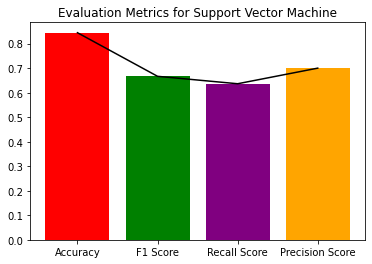

In [67]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_svm,f1_svm,recall_svm,precision_svm],color=['red','green','purple','orange'])
plt.plot([ma_svm,f1_svm,recall_svm,precision_svm],color='black')
plt.title('Evaluation Metrics for Support Vector Machine')

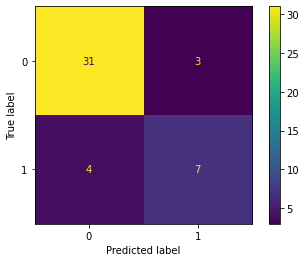

In [68]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, Y_test);

###Gaussian Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [50]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))


/opt/conda/shared/envs/ds38/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

######Evaluation of the model

In [52]:
pred = np.array(classifier.predict(X_test))

recall_gnb = rs(Y_test,pred)
precision_gnb = ps(Y_test,pred)
f1_gnb = fs(Y_test,pred)
ma_gnb = classifier.score(X_test,Y_test)

In [53]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_gnb)
print('Precision Score: ',precision_gnb)
print('F1 Score: ',f1_gnb)
print('Accuracy: ',ma_gnb)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.7272727272727273
Precision Score:  0.5333333333333333
F1 Score:  0.6153846153846153
Accuracy:  0.7777777777777778

	Table 3

     death  pred
184      0     0
170      1     0
142      0     0
182      0     0
49       1     1


Text(0.5, 1.0, 'Evaluation Metrics for Gaussian Naive Bayes')

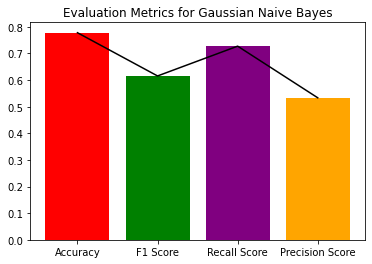

In [54]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_gnb,f1_gnb,recall_gnb,precision_gnb],color=['red','green','purple','orange'])
plt.plot([ma_gnb,f1_gnb,recall_gnb,precision_gnb],color='black')
plt.title('Evaluation Metrics for Gaussian Naive Bayes')

###Boosted Random Forest

In [55]:
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm

In [56]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
classifier = AdaBoostClassifier(rf,50,0.01,'SAMME.R',10)

/opt/conda/shared/envs/ds38/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_estimators=50, learning_rate=0.01, algorithm=SAMME.R, random_state=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [57]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))


/opt/conda/shared/envs/ds38/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2,
                                                         min_samples_leaf=2),
                   learning_rate=0.01, random_state=10)

######Evaluation of the model

In [59]:
pred = np.array(classifier.predict(X_test))

recall = rs(Y_test,pred)
precision = ps(Y_test,pred)
f1 = fs(Y_test,pred)
ma = classifier.score(X_test,Y_test)

In [60]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.75
Precision Score:  1.0
F1 Score:  0.8571428571428571
Accuracy:  0.9333333333333333

	Table 3

     death  pred
130      0     0
203      0     0
170      1     0
66       0     0
181      0     0


###Comparison of Evaluation Metrics

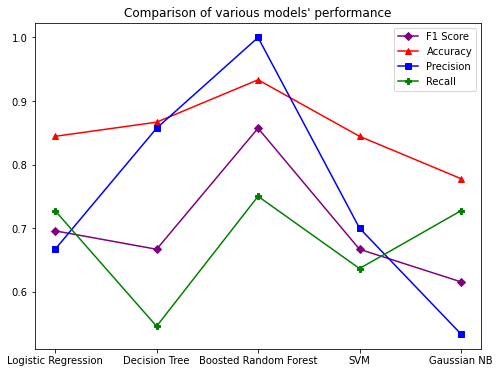

In [61]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
#plt.bar(['Logistic Regression','Decision Tree','SVM','Gaussian NB','Boosted Random Forest'],[f1_lr,f1_dtc,f1_svm,f1_gnb,f1],color=['red','green','purple','orange','Blue'])
plt.plot(['Logistic Regression','Decision Tree','Boosted Random Forest','SVM','Gaussian NB'],[f1_lr,f1_dtc,f1,f1_svm,f1_gnb],color='purple',marker='D')
plt.plot(['Logistic Regression','Decision Tree','Boosted Random Forest','SVM','Gaussian NB'],[ma_lr,ma_dtc,ma,ma_svm,ma_gnb],color='red',marker='^')
plt.plot(['Logistic Regression','Decision Tree','Boosted Random Forest','SVM','Gaussian NB'],[precision_lr,precision_dtc,precision,precision_svm,precision_gnb],color='blue',marker='s')
plt.plot(['Logistic Regression','Decision Tree','Boosted Random Forest','SVM','Gaussian NB'],[recall_lr,recall_dtc,recall,recall_svm,recall_gnb],color='green',marker='P')
plt.legend(('F1 Score','Accuracy','Precision','Recall'))
plt.title('Comparison of various models\' performance')

plt.show(fig)